# Settings

In [1]:
!git clone https://github.com/QuocThinh73/HCMAI2025.git

Cloning into 'HCMAI2025'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 79 (delta 34), reused 63 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 438.54 KiB | 12.90 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [2]:
%cd HCMAI2025

/content/HCMAI2025


In [3]:
!mkdir -p data/keyframes

In [4]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-6rsmuwie
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-6rsmuwie
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 47.0 MB/s eta 0:00:00


# Giải nén

Sau khi chạy các bước trên hãy thêm file zip vào thư mục data

In [6]:
import zipfile
import os

zip_path = "data/L08_V016.zip" # Đổi tên lại cho đúng
extract_dir = "data/keyframes"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Build FAISS

In [7]:
import glob

image_paths = sorted(glob.glob("data/keyframes/L08_V016/*.jpg", recursive=True))
image_paths

['data/keyframes/L08_V016/L08_V016_Mid_1.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_10.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_100.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_101.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_102.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_103.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_104.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_105.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_106.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_107.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_108.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_109.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_11.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_110.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_111.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_112.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_113.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_114.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_115.jpg',
 'data/keyframes/L08_V016/L08_V016_Mid_116.jpg',
 'data/keyframes/L08_V01

In [8]:
from models.clip import CLIP

model = CLIP()

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 68.2MiB/s]


In [9]:
from faiss_index import FaissIndex

my_faiss = FaissIndex(model=model)

In [10]:
my_faiss.build(image_paths=image_paths)

# Test

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

def display_results(paths, scores=None, max_images=5):
    """Display image results in Colab."""
    n = min(len(paths), max_images)
    fig, axes = plt.subplots(1, n, figsize=(15, 3))

    if n == 1:
        axes = [axes]

    for i in range(n):
        try:
            img = Image.open(paths[i])
            axes[i].imshow(img)
            if scores is not None:
                axes[i].set_title(f"Score: {scores[i]:.4f}")
            axes[i].axis('off')
        except Exception as e:
            print(f"Error displaying image {paths[i]}: {e}")

    plt.tight_layout()
    plt.show()

In [12]:
# Load FAISS index
index_path = "faiss_index/faiss_index.bin"
id2path_path = "faiss_index/id2path.pkl"

my_faiss.load(index_path, id2path_path)

1. Score: 0.2655, Index: 248, Path: data/keyframes/L08_V016/L08_V016_Mid_322.jpg
2. Score: 0.2619, Index: 206, Path: data/keyframes/L08_V016/L08_V016_Mid_285.jpg
3. Score: 0.2578, Index: 264, Path: data/keyframes/L08_V016/L08_V016_Mid_337.jpg
4. Score: 0.2575, Index: 257, Path: data/keyframes/L08_V016/L08_V016_Mid_330.jpg
5. Score: 0.2559, Index: 224, Path: data/keyframes/L08_V016/L08_V016_Mid_300.jpg


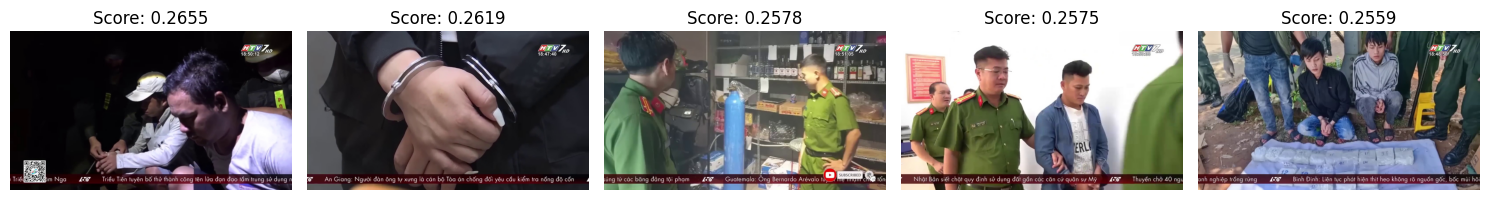

In [13]:
query = "Polices arrest criminal"
scores, indices, paths = my_faiss.text_search(query, top_k=5)

for i, (score, idx, path) in enumerate(zip(scores, indices, paths)):
           print(f"{i+1}. Score: {score:.4f}, Index: {idx}, Path: {path}")

display_results(paths, scores, 5)